## Naive Bayes Classifiers

When the number of predictor variables exceeds a handful, many of the records to be
classified will be without exact matches. This can be understood in the context of a
model to predict voting on the basis of demographic variables. 

Even a sizable sample
may not contain even a single match for a new record who is a male Hispanic with
high income from the US Midwest who voted in the last election, did not vote in the
prior election, has three daughters and one son, and is divorced. And this is just eight
variables, a small number for most classification problems. The addition of just a single  new  variable  with  five  equally  frequent  categories  reduces  the  probability  of  a
match by a factor of 5.

What are the features in this example?
- gender
- race
- income
- location
- voted in last election
- voted in the eclection before the last
- num. of sons
- num. of daughters
- married

How do we handle those features (standard scaler? one-hot-encoder?)? How do we measure the distance of two samples?

For example, what if you have two samples: What is best for K nearest Neighbor
<br>A) has all the same attributes except race (Asian)<br>
B) has all the same attributes except number of sons <br>

Should use a different algorithm. 

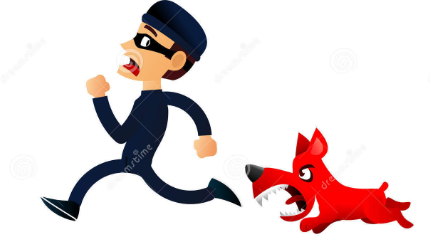

### Probabilities

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features.

P(Y|X) P(X) = P(X|Y) P(Y)

P(bark | thief) P(thief) = P(thief | bark) P(bark)

- prior probability
    - P(thief)
    - P(X)
- posterior probability
    - P(thief | bark)
    - P(X|Y)
    
If Dr. Mark hears his dog barks, does he need to grab his baseball bat immediately? We need to calculate P(thief | bark)!

Let's assume:
- P(bark) = 10%
- P(thief) = 0.000001%
- P(bark | thief) = 100%


 P(thief | bark) = P(bark | thief) P(thief) / P(bark) = 0.00001%
 
 Among 10 millions of times that Dr. Mark grab a bat, we expect there is a thief only once...

#dog barks 10% of the time
#theif low likelihood
#assume dog will bark when he sees theif 
P(bark^thief): probaility that the dogs barks and there is really a thief <br>
P(thief|bark): probability of thief given there is a bark<br>
P(bark|thief): probability of a bark given that there is a thief <br>

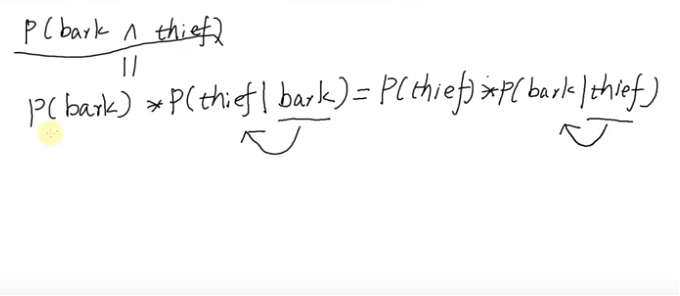

Theoretical part of Bayes Theorum: 

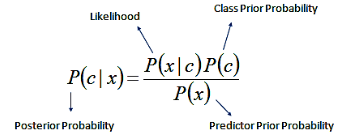

### The Naive Solution
In the naive Bayes solution, we no longer restrict the probability calculation to those
records that match the record to be classified. Instead, we use the entire data set. The
naive Bayes modification is as follows:

1.  For a binary response Y = i (i = 0 or 1), estimate the individual conditional probabilities  for  each  predictor  P (Xj|Y = i) ;  these  are  the  probabilities  that  the  predictor value is in the record when we observe Y = i. This probability is estimated by the proportion of X j  values among the Y = i records in the training set.
2.  Multiply these probabilities by each other, and then by the proportion of records belonging to Y = i.
3.  Repeat steps 1 and 2 for all the classes.
4.  Estimate a probability for outcome i by taking the value calculated in step 2 for class i and dividing it by the sum of such values for all classes.
5.  Assign the record to the class with the highest probability for this set of predictor values.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

golf_df = pd.read_csv("datasets/golf.csv",index_col=None)
golf_df

,Outlook,Temperature_num,Temperature,Humidity_num,Humidity,Windy,Play
0,overcast,83,hot,86,high,False,yes
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes
5,rainy,68,cool,80,normal,False,yes
6,rainy,65,cool,70,normal,True,no
7,rainy,75,mild,80,normal,False,yes
8,rainy,71,mild,91,high,True,no
9,sunny,85,hot,85,high,False,no


Probality of Yes and No (want to play):

P(yes) = 9/14

P(no) = 5/14

### Step 1: calculate all posterior Probabilities

If we only focus on the column *Outlook*, how many "yes" and "no" are there for each of the possible outlook value?

In [2]:
golf_df.groupby(["Outlook","Play"]).size()

Outlook   Play
overcast  yes     4
rainy     no      2
          yes     3
sunny     no      3
          yes     2
dtype: int64

What are the consitional probabilities of outlooks given this person plays or not?

P(overcast|yes) = 4/9

P(rainy|yes) = 3/9

P(sunny|yes) = 2/9

P(overcast|no) = 0/5

P(rainy|no) = 2/5

P(sunny|no) = 3/5

There are 9 yeses, and then how many overcast.
There are 5 No's. Count/YES

This is saying: given that it is a yes 9 or them), what is probability it is sunny?

In [3]:
golf_df.groupby(["Temperature","Play"]).size()

Temperature  Play
cool         no      1
             yes     3
hot          no      2
             yes     2
mild         no      2
             yes     4
dtype: int64

What are the consitional probabilities of temperatures given this person plays or not?

P(hot|yes) = 2/9

P(mild|yes) = 4/9

P(cool|yes) = 3/9

P(hot|no) = 2/5

P(mild|no) = 2/5

P(cool|no) = 1/5



In [4]:
golf_df.groupby(["Humidity","Play"]).size()

Humidity  Play
high      no      4
          yes     3
normal    no      1
          yes     6
dtype: int64

What are the consitional probabilities of humidity given this person plays or not?

P(high|yes) = 3/9

P(normal|yes) = 6/9

P(high|no) = 4/5

P(normal|no) = 1/5

In [5]:
golf_df.groupby(["Windy","Play"]).size()

Windy  Play
False  no      2
       yes     6
True   no      3
       yes     3
dtype: int64

What are the consitional probabilities of windy given this person plays or not?

P(False|yes) = 6/9

P(True|yes) = 3/9

P(False|no) = 2/5

P(True|no) = 3/5

## How do we predict?

... when:
- Outlook == Sunny
- Temperature == Cool
- Humidity == High
- Windy == True

We call those combined consitions as X.


The corresponding consitional probabilities:
- P(sunny|yes) = 2/9
- P(cool|yes) = 3/9
- P(high|yes) = 3/9
- P(True|yes) = 3/9
- P(Yes) = 9/14

- P(sunny|no) = 3/5
- P(cool|no) = 1/5
- P(high|no) = 4/5
- P(True|no) = 3/5
- P(no) = 5/14

### Step 2, 3
Step 2: Multiply these probabilities by each other, and then by the proportion of records belonging to Y = i.

P(X|yes) * P(yes) = (2/9) * (3/9) * (3/9) * (3/9) * (9/14) = 0.0053<br>
P(sunny|yes)=2/9, P(cool|yes)=3/9, P(high|yes)=3/9,P(True|yes)=3/9, P(yes)=9/14<br>
This is the probability X presents and it is a yes. 

P(X|no) * P(no) = (3/5) * (1/5) * (4/5) * (3/5) * (5/14) = 0.0206

0.0206>0.0053. This means that if X presents, you are more likely to see a no then a yes
We are going to guess the one with a higher likelihood. 


P(X) = P(Outlook=Sunny) *P(Temperature=Cool) * P(Humidity=High) * P (Wind=Strong) = (5/14) * (4/14) * (7/14) * (6/14) = 0.02186

P(X|yes) * P(yes) = P(yes|X) * P(X)

P(yes|X) = P(X|yes) * P(yes) / P(X) = 0.0053/0.02186 =0.2424

P(X|no) * P(no) = P(no|X) * P(X)

P(no|X) = P(X|no) * P(no) / P(X) = 0.0206/0.02186 = 0.9421

In [ ]:
#No again wins- higher probability No in this case

## Naive Bayes classifiers in sklearn

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed in the previous section. However, they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression.

The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn: **GaussianNB**, **BernoulliNB**, and **MultinomialNB**. 

- **GaussianNB** can be applied to any continuous data
- **BernoulliNB** assumes binary data and 
- **MultinomialNB** assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). 
- **BernoulliNB** and **MultinomialNB** are mostly used in text data classification.

We are going to Use Guassian Naive Baise

In [2]:
golf_labels = golf_df.Play
golf_features = golf_df.drop(['Play','Temperature_num', 'Humidity_num'], axis=1)
golf_features.head(3)

,Outlook,Temperature,Humidity,Windy
0,overcast,hot,high,False
1,overcast,cool,normal,True
2,overcast,mild,high,True


### The cell below is left with an error deliberately 

In [3]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(golf_features,golf_labels)

ValueError: could not convert string to float: 'overcast'

### Why? The naive Bayes classifier cannot handle strings (categorical features). =(

In [6]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
label_encoder = preprocessing.LabelEncoder()
#label encoder takes categorical featrue and transforms into three possible values: 0,1,2. 
#different from one-hot-encoder: gives three columns for each possible values (true or false), then throw one away
#This transfers one categorical column into one numerical column

In [7]:
# Encode one categorical feature
coded_Outlook_features = label_encoder.fit_transform(golf_features.Outlook) #fit and transform only one column
coded_Outlook_features

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

An encoder can only transform one column, not a entire dataframe... =(

In [18]:
# Encode all the categorical features
encoded_golf_features = golf_features.apply(preprocessing.LabelEncoder().fit_transform)# this changes all of the columns
                                                                                        #which are categorical
encoded_golf_features.head(3)

,Outlook,Temperature,Humidity,Windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1


In [19]:
# Train the model using the training sets
model.fit(encoded_golf_features, golf_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

Given a new sample:

Outlook = overcast, Temperature = hot, Huminidy = normal, Windy = False

Is this person playing on this day?

We have to transform this sample in the **same way** that the training set is transformed. How do we guarantee that?

In [20]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
d

defaultdict(sklearn.preprocessing.label.LabelEncoder, {})

In [21]:
# Encoding the variable
fit = golf_features.apply(lambda x: d[x.name].fit_transform(x))
#as we transform each part of our training set, we have a dictionary of label encoders

In [22]:
# Check the dictionary of LabelEncoders
d

defaultdict(sklearn.preprocessing.label.LabelEncoder,
            {'Outlook': LabelEncoder(),
             'Temperature': LabelEncoder(),
             'Humidity': LabelEncoder(),
             'Windy': LabelEncoder()})

In [23]:
# We have the same data frame to encoded_golf_features, but we also have a dictionary of encoders =)
fit.head(3)

,Outlook,Temperature,Humidity,Windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1


In [24]:
new_sample = {"Outlook":["overcast"], "Temperature":["hot"], "Humidity":["normal"], "Windy": [False]}
new_sample_df = pd.DataFrame(new_sample)
new_sample_df

,Outlook,Temperature,Humidity,Windy
0,overcast,hot,normal,False


In [25]:
new_sample_df = new_sample_df[["Outlook", "Temperature", "Humidity", "Windy"]]
new_sample_df

,Outlook,Temperature,Humidity,Windy
0,overcast,hot,normal,False


In [26]:
# Using the dictionary to label future data
new_sample_df = new_sample_df.apply(lambda x: d[x.name].transform(x))
new_sample_df

,Outlook,Temperature,Humidity,Windy
0,0,1,1,0


In [19]:
# Train the model using the training sets
model.fit(fit, golf_labels)
model.predict(new_sample_df)

array(['yes'], dtype='<U3')

## Exercise:
Load the golf dataframe again, use all the features (both numerical and categorical) to make a NB model.

Predict the new sample below:

Outlook = overcast, Temperature = hot, Huminidy = normal, Windy = False, Temperature_num = 82, Humidity_num = 70

In [27]:
# load the dataframe again.
golf_df = pd.read_csv("datasets/golf.csv",index_col=None)
#golf_df


In [31]:
# Drop the class label and numerical features
golf_labels = golf_df.Play
golf_categorical_features = golf_df.drop(['Play','Temperature_num', 'Humidity_num'], axis=1)

# Create a dictionary for encoders
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# For each categorical feature, create and apply an encoder
fit=golf_categorical_features.apply(lambda x: d[x.name].fit_transform(x))


# Check the encoded categorical features
fit.head(3)

,Outlook,Temperature,Humidity,Windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1


In [35]:
# Prepare the dataframe with both encoded categorical features and numeric features
fit['Temperature_num']=golf_df['Temperature_num']
fit['Humidity_num']=golf_df['Humidity_num']
#fit

In [40]:
# Create a dataframe for the new sample
new_sample = {"Outlook":["overcast"], "Temperature":["hot"], "Humidity":["normal"], "Windy": [False], "Temperature_num":82, "Humidity_num":70}
new_sample_df = pd.DataFrame(new_sample)
new_sample_df_categorical_features = new_sample_df.drop(['Temperature_num','Humidity_num'], axis=1)
new_sample_df_categorical_features=new_sample_df_categorical_features.apply(lambda x: d[x.name].transform(x))

new_sample_df_categorical_features['Temperature_num']=new_sample_df['Temperature_num']
new_sample_df_categorical_features['Humidity_num']=new_sample_df['Humidity_num']


new_sample_df=new_sample_df_categorical_features
new_sample_df=new_sample_df[['Outlook','Temperature','Humidity','Windy','Temperature_num','Humidity_num']]
new_sample_df


,Outlook,Temperature,Humidity,Windy,Temperature_num,Humidity_num
0,0,1,1,0,82,70


In [41]:
# Train the model using the training sets, then make a prediction
model.fit(fit,golf_labels)
model.predict(new_sample_df)

array(['yes'], dtype='<U3')

## Advantages/Disadvantages

Advantages:
- Naive Bayes has very low computation cost, it can efficiently work on a large dataset.
- It can be used with multiple class prediction problems. 
- It also performs well in the case of text analytics problems.

Problem(s):
- The assumption of independent features. 
    - In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
- If we have an category which is not observed in the training data...
    - not able to predict: "zero frequency"
        - we should have at least one case for each category
- Bad estimator:
    - the probabilities are known to be unreliable
        - but we can trust the comparisons


### To sum up
- Naive Bayes is the one of the straightforward algorithm.
    - ... but it has a bad name, it's not that naïve
- Assumption of independence of features
    - check if this assumption holds first

Do not need to standardize, because we are not considering distancing here

Naive Bayes: not measuring distances. 

Good for big datasets

Assumes all variable independent

